In [62]:
#Import the necessary libraries if you are starting a new notebook.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
customer_df = pd.read_csv('/Users/segre/OneDrive/Desktop/IRONHACK/data/data_4.05_activities/files_for_activities/lesson_4.05_data.csv')

In [5]:
customer_df.head()

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,GENDER,HOMEOWNR,DOMAIN_letters,RFA_frequency,RFA_monetary,AVGGIFT
0,479,307,12883,27,14,31,4.0,37.000000,F,other,T,4,E,7.741935
1,5468,1088,36175,12,13,3,18.0,52.000000,M,H,S,2,G,15.666667
2,497,251,11576,26,14,27,12.0,37.570799,M,U,R,4,E,7.481481
3,1000,386,15130,27,14,16,9.0,28.000000,F,U,R,4,E,6.812500
4,576,240,9836,43,25,37,14.0,20.000000,F,H,S,2,F,6.864865


In [6]:
customer_df.describe()

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,RFA_frequency,AVGGIFT
count,88393.000000,88393.000000,88393.000000,88393.000000,88393.000000,88393.000000,88393.000000,88393.000000,88393.000000,88393.000000
mean,1054.259738,338.994185,15664.768964,18.309006,12.750704,9.420542,8.117886,37.570800,1.890862,13.362776
std,934.164585,161.959068,8498.439039,8.562281,4.342426,8.416546,7.886617,13.513817,1.065073,9.709543
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,10.000000,1.000000,1.285714
25%,509.000000,230.000000,10756.000000,11.000000,11.000000,3.000000,4.000000,28.000000,1.000000,8.461538
50%,733.000000,309.000000,13680.000000,18.000000,12.000000,7.000000,7.000000,37.570799,1.000000,11.666667
75%,1203.000000,413.000000,18112.000000,25.000000,13.000000,13.000000,10.000000,46.000000,3.000000,15.615385
max,6000.000000,1500.000000,159306.000000,61.000000,65.000000,237.000000,1088.000000,97.000000,4.000000,1000.000000


In [67]:
customer_df.shape

(9134, 24)

In [68]:
customer_df.columns = list(map(lambda x: x.lower().replace(' ', '_'),customer_df.columns))

In [69]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [70]:
customer_df = customer_df.rename({'employmentstatus': 'employment_status'}, axis='columns')

In [71]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')

In [72]:
customer_df = customer_df.drop('customer', axis=1)

In [73]:
#Check nan values per column.


In [74]:
for col in customer_df.columns:
    pct_missing = np.mean(customer_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

state - 0%
customer_lifetime_value - 0%
response - 0%
coverage - 0%
education - 0%
effective_to_date - 0%
employment_status - 0%
gender - 0%
income - 0%
location_code - 0%
marital_status - 0%
monthly_premium_auto - 0%
months_since_last_claim - 0%
months_since_policy_inception - 0%
number_of_open_complaints - 0%
number_of_policies - 0%
policy_type - 0%
policy - 0%
renew_offer_type - 0%
sales_channel - 0%
total_claim_amount - 0%
vehicle_class - 0%
vehicle_size - 0%


In [75]:
customer_df.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [76]:
#Load the continuous and discrete variables into continuous_df and discrete_df variables.


In [77]:
numericals = customer_df.select_dtypes(exclude = 'object')

In [78]:
discrete_df = pd.DataFrame()
for col in numericals.columns:
    if len(numericals[col].unique())<10:
        discrete_df[col]= numericals[col]
        numericals = numericals.drop(col, axis=1)

In [79]:
continuous_df = numericals 

In [80]:
 continuous_df.head()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,2011-02-24,56274,69,32,5,384.811147
1,6979.535903,2011-01-31,0,94,13,42,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,566.472247
3,7645.861827,2011-01-20,0,106,18,65,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,138.130879


In [81]:
#Plot a correlation matrix, what can you see?


In [82]:
#Create a function to plot every discrete variables. 
#Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
#countplot for discrete or sns.boxplot
#continuous https://www.analyseup.com/python-data-science-reference/seaborn-continuous-variables.html

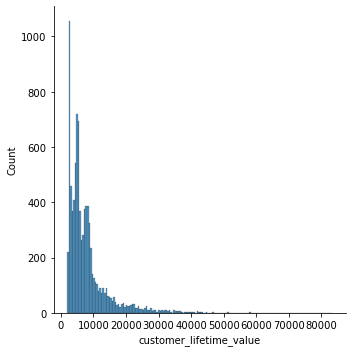

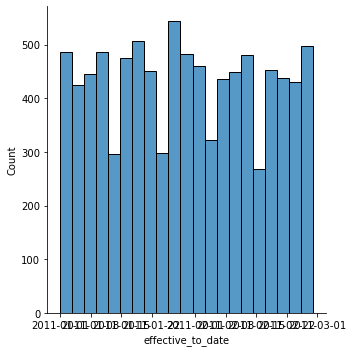

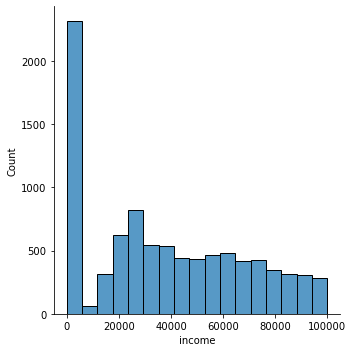

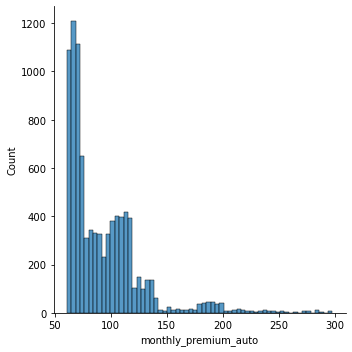

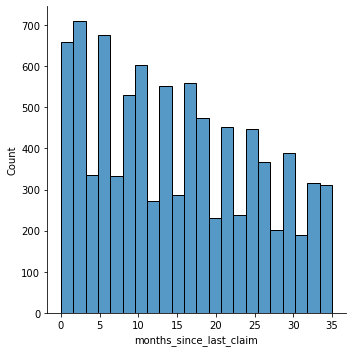

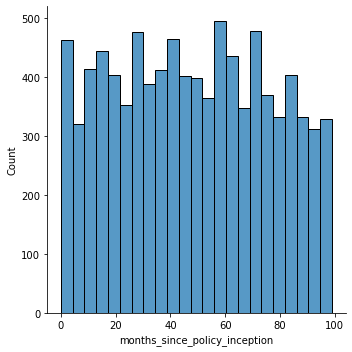

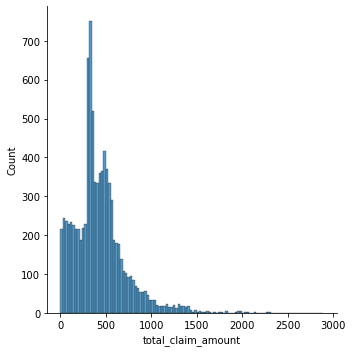

In [83]:
for x in continuous_df.columns:
    sns.displot(continuous_df[x])

In [84]:
discrete_df.head()

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


In [85]:
continuous_df.head()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,2011-02-24,56274,69,32,5,384.811147
1,6979.535903,2011-01-31,0,94,13,42,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,566.472247
3,7645.861827,2011-01-20,0,106,18,65,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,138.130879


In [86]:
#What can you see in the plots?


In [87]:
categoricals = customer_df.select_dtypes(include = 'object')

In [88]:
#Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.


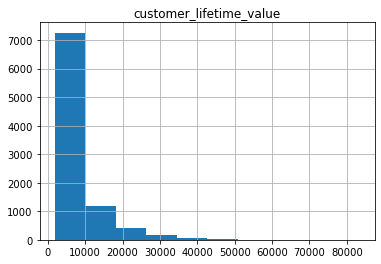

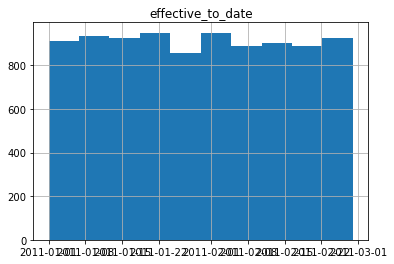

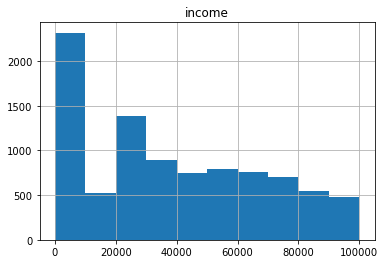

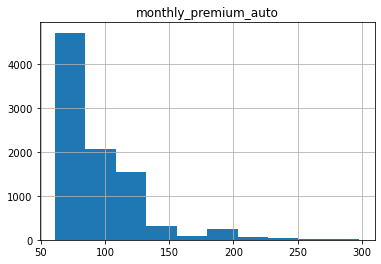

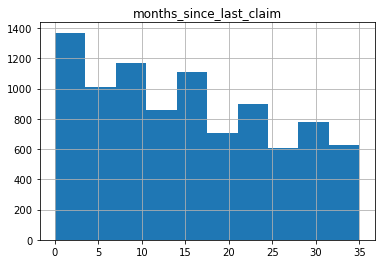

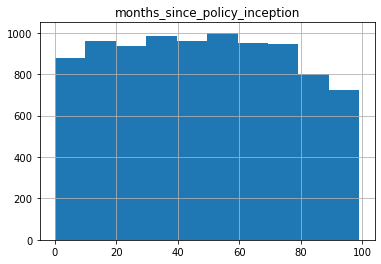

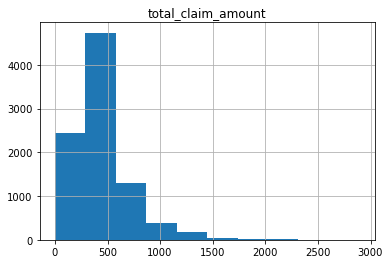

In [89]:
for x in continuous_df.columns:
    continuous_df.hist(x)
plt.show() 

In [90]:
continuous_df_ohnedate = continuous_df.drop('effective_to_date', axis=1)

In [91]:
continuous_df_ohnedate.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [92]:
#def plot_cat2(df):
 #   for i in range(categoricals.shape[1]):
 #       sns.barplot(x = categoricals[categoricals.columns[i]].value_counts().index, y = categoricals[categoricals.columns[i]].value_counts())
 #       plt.show()
        
#categoricals.apply(plot_cat2, axis=0)

In [93]:
#Have you found outliers? If you have, what should we do with them?


In [94]:
continuous_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


<AxesSubplot:>

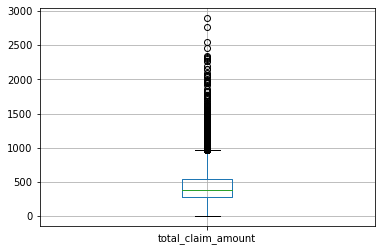

In [95]:
continuous_df.boxplot(column=['total_claim_amount'])

<AxesSubplot:>

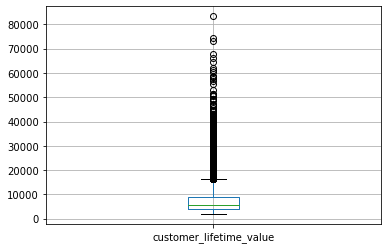

In [96]:
continuous_df.boxplot(column=['customer_lifetime_value'])

LAB 4.4

We will start with removing outliers. 
So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [ ]:
#check notes on lab for threshold approach, below normal iqr

In [98]:
iqr = np.percentile(continuous_df['customer_lifetime_value'],75) - np.percentile(continuous_df['customer_lifetime_value'],25)
upper_limit = np.percentile(continuous_df['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(continuous_df['customer_lifetime_value'],25) - 1.5*iqr
continuous_df = continuous_df[(continuous_df['customer_lifetime_value']>lower_limit) & (continuous_df['customer_lifetime_value']<upper_limit)]

work on categoricals, not needed

In [109]:
categoricals['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [110]:
categoricals['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [ ]:
#we could cluster upper education in 'upper' category

In [113]:
categoricals['employment_status'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64

In [ ]:
#we could cluster disabled and retired in 'upper' category

In [114]:
categoricals['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Grouping together the categorical variables to have fewer buckets

In [118]:
mapping = {
        'California':'West Coast',
        'Oregon':'West Coast',
        'Arizona':'Gulf Coast',
        'Nevada':'Mid West',
        'Washington':'East Coast',
    }

categoricals['state'].replace(mapping)

0       East Coast
1       Gulf Coast
2         Mid West
3       West Coast
4       East Coast
           ...    
9129    West Coast
9130    West Coast
9131    West Coast
9132    West Coast
9133    West Coast
Name: state, Length: 9134, dtype: object

In [120]:
mapping = {
        'Employed':'Employed',
        'Medical Leave':'Employed',
        'Unemployed':'Unemployed',
        'Retired':'Unemployed',
        'Disabled':'Unemployed',
    }

categoricals['employment_status'].replace(mapping)

0         Employed
1       Unemployed
2         Employed
3       Unemployed
4         Employed
           ...    
9129      Employed
9130      Employed
9131    Unemployed
9132      Employed
9133    Unemployed
Name: employment_status, Length: 9134, dtype: object

Create a copy of the dataframe for the data wrangling.


In [122]:
df_copy = customer_df.copy()

Normalize the continuous variables. You can use any one method you want.


In [124]:
numeric= customer_df.select_dtypes(exclude = 'object')

In [ ]:
discrete_df = pd.DataFrame()
for col in numericals.columns:
    if len(numericals[col].unique())<10:
        discrete_df[col]= numericals[col]
        numericals = numericals.drop(col, axis=1)

In [ ]:
continuous_df = numericals 

To check

In [125]:
numeric['customer_lifetime_value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: customer_lifetime_value, dtype: float64

In [103]:
#Encode the categorical variables

In [104]:
#The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.


In [ ]:
customer_df['effective_to_date'] = customer_df['effective_to_date'].dt.isocalendar().week

In [105]:
#Since the model will only accept numerical data, check and make sure that every column is numerical, 
#if some are not, change it using encoding.
#Hint for Categorical Variables



In [ ]:
customer_df

In [106]:
#You should deal with the categorical variables as shown below (for ordinal encoding, 
#dummy code has been provided as well):
# One hot to state
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size

#data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.